In [81]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### import dataset

In [82]:
data= pd.read_csv("heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### hyperparameter tunning

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt","None"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
x = data.drop("target", axis=1)
y = data["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_est

C:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

In [114]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [85]:
#rs_clf.fit(x_train, y_train)


In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = data.drop("target",axis=1)
y=data["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
#clf = RandomForestClassifier()
clf1=RandomForestClassifier(n_estimators=1200,min_samples_split=6,min_samples_leaf=4,max_features='sqrt',max_depth=30)

cvs=cross_val_score(clf1,x,y, cv=10)

In [117]:
np.mean(cvs)

0.8448387096774195

In [118]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cvs) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 84.48%


In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### ROC

In [120]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.87, 0.13],
        [0.01, 0.99],
        [0.21, 0.79],
        [0.87, 0.13],
        [0.25, 0.75],
        [0.23, 0.77],
        [0.27, 0.73],
        [0.03, 0.97],
        [0.54, 0.46],
        [0.82, 0.18]]),
 61)

In [121]:
ypp= y_probs[:,1]
ypp[:10]

array([0.13, 0.99, 0.79, 0.13, 0.75, 0.77, 0.73, 0.97, 0.46, 0.18])

In [122]:
fpr,tpr,thresholds=roc_curve(y_test,ypp)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.06666667, 0.06666667, 0.13333333, 0.13333333,
       0.16666667, 0.23333333, 0.36666667, 0.36666667, 0.43333333,
       0.5       , 0.6       , 0.73333333, 1.        ])

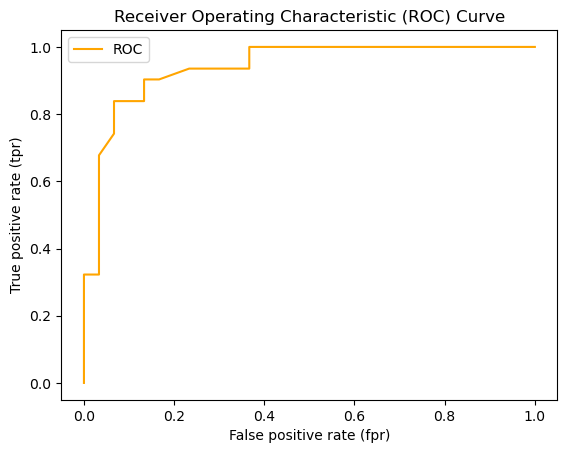

In [123]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
    

In [124]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypp)

0.9397849462365592

### confussion matrix

In [125]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  7],
       [ 2, 29]], dtype=int64)

In [126]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,7
1,2,29


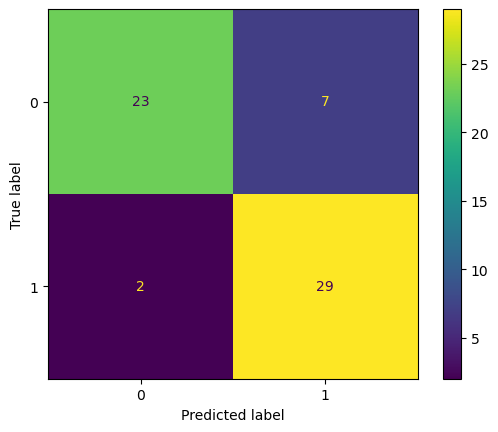

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### save model

In [129]:
import pickle

pickle.dump(clf,open("firstdep.pkl","wb"))

### deploy the model

In [130]:
loaded_pickle_model = pickle.load(open("firstdep.pkl", "rb"))

In [131]:
loaded_pickle_model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [132]:
loaded_pickle_model.predict([[63,1,3,145,233,1,0,150,1,2.3,0,0,1]])

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [133]:
loaded_pickle_model.predict([[63,0,3,145,233,1,0,150,0,2.3,0,0,1]])

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [134]:
loaded_pickle_model.predict([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

C:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)